![](https://2rdnmg1qbg403gumla1v9i2h-wpengine.netdna-ssl.com/wp-content/uploads/sites/3/2018/08/GettyImages-498686795-650x450.jpg)
# Introduction

## History
According to World Health Organisation (WHO), heart diseases, also a part of cardiovascular diseases, are the number 1 cause of death globally- killing 17.9 millions of lives every year. People who are suffering from heart diseases are known to demonstrate high blood pressure, lipids, glucose as well as obesity and overweight issues. The ability to identify these high risk factors will ensure that the patients receieve appropriate medical care and prevent premature deaths. 

## Understanding this study
We have the following information about our dataset:
- Age
- Sex: (1 = Male, 0 = Female)
- cp(chest pain type): 
    * 1 = typical angina
    * 2 = atypical angina
    * 3 = non-anginal pain 
    * 4 = asymptomatic
- trestbps: Resting blood pressure (in mm Hg on admission to the hospital)
- chol: Serum cholestoral in mg/dl
- fbs: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
- restecg: Resting electrocardiographic results
    * 0: Normal
    * 1: Having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * 2: Showing probable or definite left ventricular hypertrophy by Estes' criteria
- thalach: Maximum heart rate achieved 
- exang: Exercise induced angina (1 = yes; 0 = no)
- oldpeak: ST depression induced by exercise relative to rest
- slope: The slope of the peak exercise ST segment
    * 1: Upsloping
    * 2: Flat
    * 3: Downsloping
- ca: Number of major vessels (0-3) colored by flourosopy
- thal: Thalium heart scan
    * 3: Normal
    * 6: Fixed defect
    * 7: Reversable defect
- target: Diagnosis of heart disease
    * 1: Yes
    * 0: No
    
## Objective
- Find any correlations between attributes
- Find correlations between each attribute and the diagnosis of heart disease

First step is to import the required packages, namely numpy, pandas, matplotlib and seaborn.

In [1]:
# Importing packages
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats # Needed to compute statistics for categorical data

Importing dataset into notebook and have a preview. 

In [2]:
# Importing dataset
heart_data = pd.read_csv('../input/heart-disease/heart.csv')
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Now, let's check for any unknown, NaN or NULL values.

In [3]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Looking good! We do know that some of the attributes like sex, slope, target have numbers denoting their categorical attributes. We will need to change them to something we can understand without looking back. So here is what we're going to do:
- For sex, we will change 1 to 'Male' and 0 to 'Female'.
- For cp (chest pain), we will change:
    * 1 to 'typical_ang' 
    * 2 to 'atypical_ang' 
    * 3 to 'non_anginal_pain' 
    * 4 to 'asymptomatic'
- fbs (fasting blood sugar): 
    * 1 to 'True'
    * 0 to 'False'
- restecg: 
    * 0 to 'normal' 
    * 1 to 'st_abnormality'
    * 2 to 'prob_lvh'
- exang (Exercise induced angina):
    * 1 to 'yes'
    * 0 to 'no'
- slope: The slope of the peak exercise ST segment
    * 1 to 'upsloping'
    * 2 to 'flat'
    * 3 to 'downsloping'
- thal: Thalium heart scan
    * 3 to 'normal'
    * 6 to 'fixed_def'
    * 7 to 'rev_def'
- target: 1 to 'yes', 0 to 'no'


In [4]:
heart_data['sex'] = heart_data.sex.replace([1,0], ['male', 'female'])
heart_data['cp'] = heart_data.cp.replace([0,1,2,3,4], ['no_cp','typical_ang', 'atypical_ang', 'non_anginal_pain', 'asymptomatic'])
heart_data['fbs'] = heart_data.fbs.replace([1,0], ['true', 'false'])
heart_data['restecg'] = heart_data.restecg.replace([0,1,2], ['normal', 'st_abnormality', 'prob_lvh'])
heart_data['exang'] = heart_data.exang.replace([0,1], ['no', 'yes'])
heart_data['slope'] = heart_data.slope.replace([0,1,2,3], ['no_slope','upsloping', 'flat', 'downsloping'])
heart_data['thal'] = heart_data.thal.replace([3,6,7], ['normal', 'fixed_def', 'rev_def'])
heart_data['target'] = heart_data.target.replace([1,0], ['yes', 'no'])
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,non_anginal_pain,145,233,true,normal,150,no,2.3,no_slope,0,1,yes
1,37,male,atypical_ang,130,250,false,st_abnormality,187,no,3.5,no_slope,0,2,yes
2,41,female,typical_ang,130,204,false,normal,172,no,1.4,flat,0,2,yes
3,56,male,typical_ang,120,236,false,st_abnormality,178,no,0.8,flat,0,2,yes
4,57,female,no_cp,120,354,false,st_abnormality,163,yes,0.6,flat,0,2,yes


Here, we will use the PairPlot tool from Seaborn to see the distribution and relationships among variables. Since pairplot won't work well with categorical data, we can only pick numerical data for this case. 

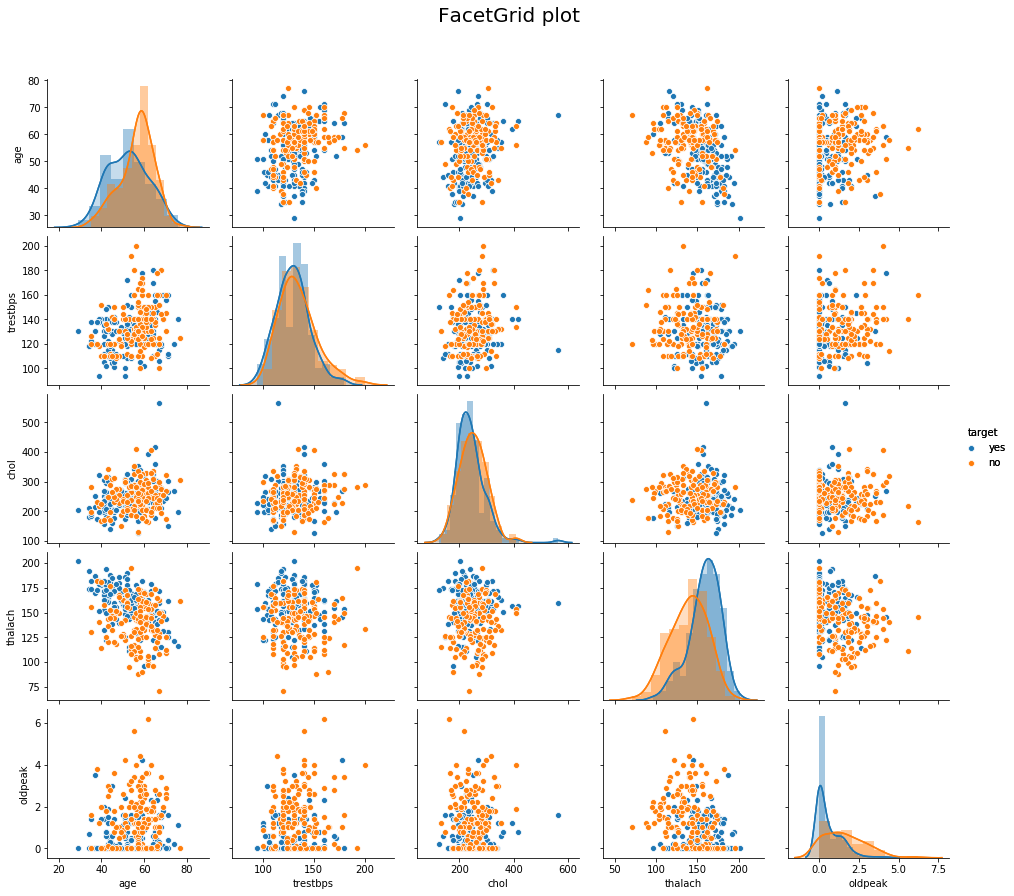

In [5]:
g = sns.pairplot(heart_data, vars =['age', 'trestbps', 'chol', 'thalach', 'oldpeak' ], hue = 'target')
g.map_diag(sns.distplot)
g.add_legend()
g.fig.suptitle('FacetGrid plot', fontsize = 20)
g.fig.subplots_adjust(top= 0.9);

## What do we see here?
- Other than resting blood pressure, we do see distinct differences between heart disease patients and healthy patients in the targeted attributes. 
- For instance, we do see an even distribution of heart disease patients in the age category, while healthly patients are more distributed to the right. 

## Let's look at correlations!

- Note: Correlation is determined by Person's R and can't be defined when the data is categorical. Hence, we need to change the categorical atttributes back to numeric for this analysis. 
- We will simply rename the required variable.

In [6]:
# Plotting correlation matrix
heart_data1 = pd.read_csv('../input/heart-disease/heart.csv')
corr = heart_data1.corr()
corr.style.background_gradient(cmap='RdBu_r')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1,-0.0984466,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.0968008,0.210013,-0.168814,0.276326,0.0680014,-0.225439
sex,-0.0984466,1,-0.0493529,-0.0567688,-0.197912,0.0450318,-0.0581963,-0.0440199,0.141664,0.0960929,-0.0307106,0.118261,0.210041,-0.280937
cp,-0.068653,-0.0493529,1,0.0476078,-0.0769044,0.094444,0.0444206,0.295762,-0.39428,-0.14923,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.0567688,0.0476078,1,0.123174,0.177531,-0.114103,-0.0466977,0.0676161,0.193216,-0.121475,0.101389,0.0622099,-0.144931
chol,0.213678,-0.197912,-0.0769044,0.123174,1,0.0132936,-0.15104,-0.00993984,0.0670228,0.0539519,-0.00403777,0.0705109,0.098803,-0.0852391
fbs,0.121308,0.0450318,0.094444,0.177531,0.0132936,1,-0.0841891,-0.00856711,0.0256651,0.00574722,-0.0598942,0.137979,-0.0320193,-0.0280458
restecg,-0.116211,-0.0581963,0.0444206,-0.114103,-0.15104,-0.0841891,1,0.0441234,-0.0707329,-0.0587702,0.0930448,-0.0720424,-0.0119814,0.13723
thalach,-0.398522,-0.0440199,0.295762,-0.0466977,-0.00993984,-0.00856711,0.0441234,1,-0.378812,-0.344187,0.386784,-0.213177,-0.0964391,0.421741
exang,0.0968008,0.141664,-0.39428,0.0676161,0.0670228,0.0256651,-0.0707329,-0.378812,1,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.0960929,-0.14923,0.193216,0.0539519,0.00574722,-0.0587702,-0.344187,0.288223,1,-0.577537,0.222682,0.210244,-0.430696


From here, we can see that there is a close correlation between chest pain factors, maximum heart rate achieved and the slope and whether the patient is healthy or a heart disease patient. Except for these attributes, the rest seem to show very weak correlation.

### Let's look closely into some attributes.

# Finding correlation between age and whether the patient has heart disease

Firstly, let's look at the distribution.

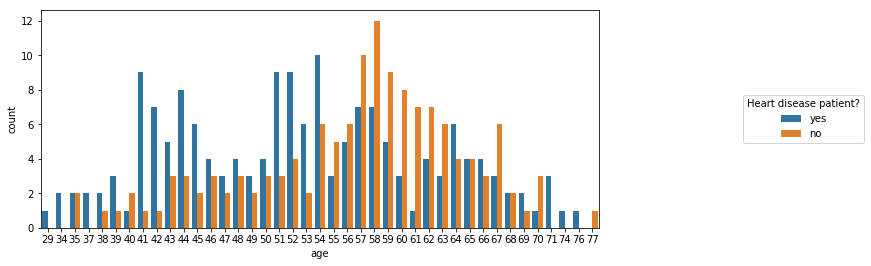

In [7]:
plt.figure(figsize=(10,4))
plt.legend(loc='upper left')
g = sns.countplot(data = heart_data, x = 'age', hue = 'target')
g.legend(title = 'Heart disease patient?', loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

In [8]:
age_corr = ['age', 'target']
age_corr1 = heart_data[age_corr]
age_corr_y = age_corr1[age_corr1['target'] == 'yes'].groupby(['age']).size().reset_index(name = 'count')
age_corr_y.corr()

,age,count
age,1.000000,-0.129151
count,-0.129151,1.000000


Text(0.5, 1.0, 'Correlation graph for Age vs heart disease patient')

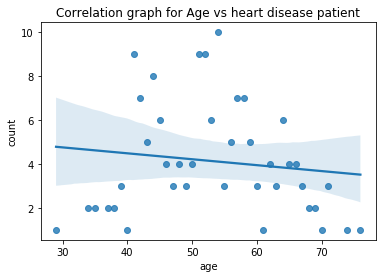

In [9]:
sns.regplot(data = age_corr_y, x = 'age', y = 'count').set_title("Correlation graph for Age vs heart disease patient")

In [10]:
age_corr_n = age_corr1[age_corr1['target'] == 'no'].groupby(['age']).size().reset_index(name = 'count')
age_corr_n.corr()

,age,count
age,1.000000,0.337858
count,0.337858,1.000000


Text(0.5, 1.0, 'Correlation graph for Age vs healthy patient')

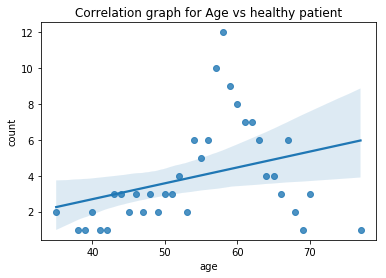

In [11]:
sns.regplot(data = age_corr_n, x = 'age', y = 'count').set_title("Correlation graph for Age vs healthy patient")

## What can we say about this?
- Well, can we say that older people are more susceptible to heart diseases? Not really for this case. We do see an even distribution of heart disease patients across all ages. In fact we even saw a positive correlation between age and healthy patients. This sadly, does not indicate anything significant to us as it just shows an overview of people participating in the study and not a precursor of heart disease. 

# Correlation between sex and heart disease 

In [12]:
# Showing number of heart disease patients based on sex
sex_corr = ['sex', 'target']
sex_corr1 = heart_data[sex_corr]
sex_corr_y = sex_corr1[sex_corr1['target'] == 'yes'].groupby(['sex']).size().reset_index(name = 'count')
sex_corr_y

,sex,count
0,female,72
1,male,93


In [13]:
# Showing number of healthy patients based on sex 
sex_corr_n = sex_corr1[sex_corr1['target'] == 'no'].groupby(['sex']).size().reset_index(name = 'count')
sex_corr_n

,sex,count
0,female,24
1,male,114


Text(0.5, 1.0, 'Boxplot showing age vs sex')

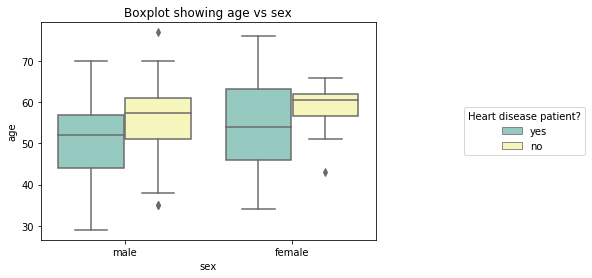

In [14]:
g1 = sns.boxplot(data = heart_data, x = 'sex', y = 'age', hue = 'target',palette="Set3")
g1.legend(title = 'Heart disease patient?', loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
g1.set_title('Boxplot showing age vs sex')

As we know, sex is a categorical variable. Target, which tells us whether the patient has heart disease or not is also a categorical variable. To compute the correlation between two categorical data, we will need to use Chi-Square test. We will be using 95% confidence interval (95% chance that the confidence interval you calculated contains the true population mean). 
- The null hypothesis is that they are independent.
- The alternative hypothesis is that they are correlated in some way. 

In [15]:
# Chi-sq test
cont = pd.crosstab(heart_data["sex"],heart_data["target"])
scipy.stats.chi2_contingency(cont)

(22.717227046576355,
 1.8767776216941503e-06,
 1,
 array([[ 43.72277228,  52.27722772],
        [ 94.27722772, 112.72277228]]))

## What can we say about this?
We performed the test and we obtained a p-value < 0.05 and we can reject the hypothesis of independence. So is there truly a correlation between sex and heart disease? Well, I can't really accept this result here mainly for one reason. The data for healthy female is too low. We only have 24 female individuals that are healthy. If we were to push the number up to, let's say 94, we will get a much higher p-value. Hence, I feel that there is no point in performing a correlation analysis if the difference between the test samples are too high.

# Correlation between types of chest pain and heart disease 

### An overview of types of chest pains in heart disease patients

In [16]:
# Showing number of heart disease patients based on cp
cp_corr = ['cp', 'target']
cp_corr1 = heart_data[cp_corr]
cp_corr_y = cp_corr1[cp_corr1['target'] == 'yes'].groupby(['cp']).size().reset_index(name = 'count')
cp_corr_y

,cp,count
0,atypical_ang,69
1,no_cp,39
2,non_anginal_pain,16
3,typical_ang,41


In [17]:
# Showing number of healthy patients based on cp 
cp_corr_n = cp_corr1[cp_corr1['target'] == 'no'].groupby(['cp']).size().reset_index(name = 'count')
cp_corr_n

,cp,count
0,atypical_ang,18
1,no_cp,104
2,non_anginal_pain,7
3,typical_ang,9


What we can see here is that heart disease patients tend to experience all 3 types of chest pain while healthy patients generally do not experience any chest pains. Hence, without any statistical test, we can say that there is definitely a correlation between chest pain and heart disease patient. 
- However, we will still need to prove this through the Chi-sqaure test.

In [18]:
# Chi-square test
cont1 = pd.crosstab(heart_data["cp"],heart_data["target"])
scipy.stats.chi2_contingency(cont1)

(81.68642755194443,
 1.3343043373050165e-17,
 3,
 array([[39.62376238, 47.37623762],
        [65.12871287, 77.87128713],
        [10.47524752, 12.52475248],
        [22.77227723, 27.22772277]]))

# Correlation between resting blood pressure and heart disease

In [19]:
# Showing number of heart disease patients based on trestbps
restbp_corr = ['trestbps', 'target']
restbp_corr1 = heart_data[restbp_corr]
restbp_corr_y = restbp_corr1[restbp_corr1['target'] == 'yes'].groupby(['trestbps']).size().reset_index(name = 'count')
restbp_corr_y.corr()

,trestbps,count
trestbps,1.000000,-0.093598
count,-0.093598,1.000000


Text(0.5, 1.0, 'Correlation between resting blood pressure and heart disease patients')

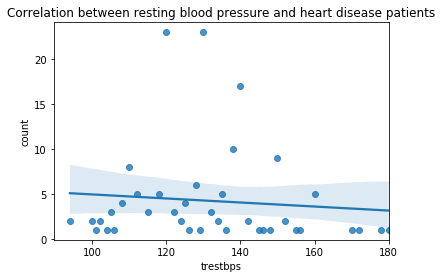

In [20]:
sns.regplot(data = restbp_corr_y, x = 'trestbps', y = 'count').set_title('Correlation between resting blood pressure and heart disease patients')

In [21]:
restbp_corr_n = restbp_corr1[restbp_corr1['target'] == 'no'].groupby(['trestbps']).size().reset_index(name = 'count')
restbp_corr_n.corr()

,trestbps,count
trestbps,1.000000,-0.262763
count,-0.262763,1.000000


Text(0.5, 1.0, 'Correlation between resting blood pressure and healthy patients')

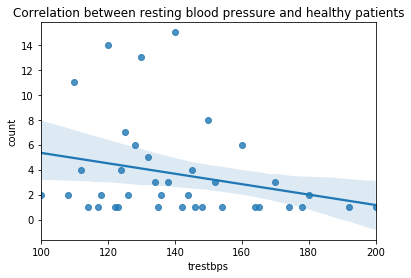

In [22]:
sns.regplot(data = restbp_corr_n, x = 'trestbps', y = 'count').set_title('Correlation between resting blood pressure and healthy patients')

## What do we see here
- We see weak correlation between resting blood pressure and whether the patient has heart disease.

# Correlation between serum cholesterol and heart disease

In [23]:
# Showing number of heart disease patients based on serum cholesterol
chol_corr = ['chol', 'target']
chol_corr1 = heart_data[chol_corr]
chol_corr1.chol = chol_corr1.chol.round(decimals=-1)
chol_corr_y = chol_corr1[chol_corr1['target'] == 'yes'].groupby(['chol']).size().reset_index(name = 'count')
chol_corr_y.corr()

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,chol,count
chol,1.000000,-0.261546
count,-0.261546,1.000000


Text(0.5, 1.0, 'Correlation between serum cholesterol and heart disease patients')

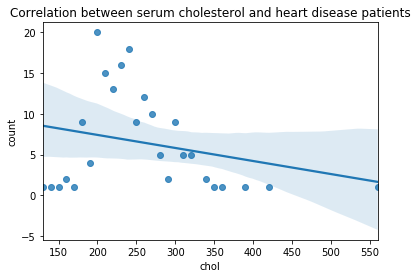

In [24]:
sns.regplot(data = chol_corr_y, x = 'chol', y = 'count').set_title('Correlation between serum cholesterol and heart disease patients')

In [25]:
chol_corr_n = chol_corr1[chol_corr1['target'] == 'no'].groupby(['chol']).size().reset_index(name = 'count')
chol_corr_n.corr()

,chol,count
chol,1.000000,-0.014997
count,-0.014997,1.000000


Text(0.5, 1.0, 'Correlation between serum cholesterol and healthy patients')

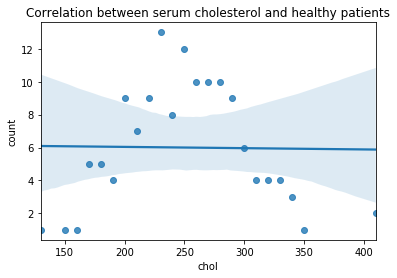

In [26]:
sns.regplot(data = chol_corr_n, x = 'chol', y = 'count').set_title('Correlation between serum cholesterol and healthy patients')

## What do we see here?
- We do not see a correlation between the level of serum cholesterol and heart disease. 

# Correlation between fasting blood sugar and heart disease 

In [27]:
# Showing number of heart disease patients based on fasting blood sugar
fbs_corr = ['fbs', 'target']
fbs_corr1 = heart_data[fbs_corr]
fbs_corr_y = fbs_corr1[fbs_corr1['target'] == 'yes'].groupby(['fbs']).size().reset_index(name = 'count')
fbs_corr_y

,fbs,count
0,false,142
1,true,23


In [29]:
# Showing number of healthy patients based on fasting blood sugar
fbs_corr_n = fbs_corr1[fbs_corr1['target'] == 'no'].groupby(['fbs']).size().reset_index(name = 'count')
fbs_corr_n

,fbs,count
0,false,116
1,true,22


Performing Chi-Sq test

In [28]:
# Chi-square test
cont3 = pd.crosstab(heart_data["fbs"],heart_data["target"])
scipy.stats.chi2_contingency(cont3)

(0.10627276301947715,
 0.7444281114149577,
 1,
 array([[117.5049505, 140.4950495],
        [ 20.4950495,  24.5049505]]))

## What do we see here?
- We obtained a p-value of 0.744. Therefore we will accept the hypothesis of independence.

# Correlation between resting ECG results and heart disease

In [30]:
# Showing number of heart disease patients based on resting ECG results
restecg_corr = ['restecg', 'target']
restecg_corr1 = heart_data[restecg_corr]
restecg_corr_y = restecg_corr1[restecg_corr1['target'] == 'yes'].groupby(['restecg']).size().reset_index(name = 'count')
restecg_corr_y

,restecg,count
0,normal,68
1,prob_lvh,1
2,st_abnormality,96


In [31]:
restecg_corr_n = restecg_corr1[restecg_corr1['target'] == 'no'].groupby(['restecg']).size().reset_index(name = 'count')
restecg_corr_n

,restecg,count
0,normal,79
1,prob_lvh,3
2,st_abnormality,56


In [32]:
# Chi-square test
cont4 = pd.crosstab(heart_data["restecg"],heart_data["target"])
scipy.stats.chi2_contingency(cont4)

(10.023091785081,
 0.006660598773498031,
 2,
 array([[66.95049505, 80.04950495],
        [ 1.82178218,  2.17821782],
        [69.22772277, 82.77227723]]))

## What do we see here?
- We obtained a p-value of 0.00666. This shows that there is a correlation between the various types of ECG results and heart disease. We do see a huge difference in ST-T wave abnormality between healthy and heart disease patients. 

# Correlation between maximum heart rate achieved and heart disease 

In [39]:
# Showing number of heart disease patients based on maximum heart rate
heartrate_corr = ['thalach', 'target']
heartrate_corr1 = heart_data[heartrate_corr]
heartrate_corr_y = heartrate_corr1[heartrate_corr1['target'] == 'yes'].groupby(['thalach']).size().reset_index(name = 'count')
heartrate_corr_y.corr()

,thalach,count
thalach,1.000000,0.239275
count,0.239275,1.000000


Text(0.5, 1.0, 'Correlation between maximum heart rate and heart disease patients')

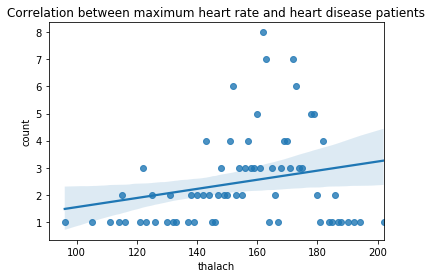

In [40]:
sns.regplot(data = heartrate_corr_y, x = 'thalach', y = 'count').set_title('Correlation between maximum heart rate and heart disease patients')

In [41]:
heartrate_corr_n = heartrate_corr1[heartrate_corr1['target'] == 'no'].groupby(['thalach']).size().reset_index(name = 'count')
heartrate_corr_n.corr()

,thalach,count
thalach,1.000000,0.133651
count,0.133651,1.000000


Text(0.5, 1.0, 'Correlation between maximum heart rate and healthy patients')

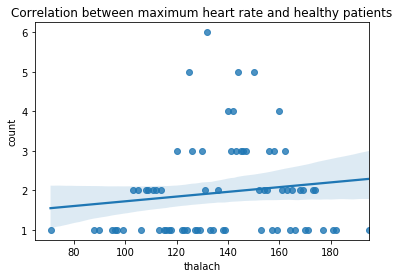

In [42]:
sns.regplot(data = heartrate_corr_n, x = 'thalach', y = 'count').set_title('Correlation between maximum heart rate and healthy patients')

## What do we see here?
- We do not see a strong correlation between maximum heart rate and heart disease. If we look into the distribution, we do see close similarity in maximum heart rate in both heart disease patients and healthy patients. 

# Summary
- We have tested most of the attributes for correlation and from the results, we can confidently say that both resting ECG results and types of chest pains are correlated to heart disease. 
- Although we do see a correlation when performing Chi-Sq test on the gender attribute, the huge difference in healthy female data posed a huge concern for its accuracy. 